In [2]:
%load_ext autoreload
%autoreload 2

#Packages
import numpy as np
import matplotlib.pyplot as plt 
import pickle

#.py
from core import qlearning as q 
from core import prices as pr 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Variation of demand function or price grid 

In [3]:
# Path to the pickle file
pickle_file_path = '/Volumes/OS-Data/Suzie_data/RLandPricing/data/data_demand_grid.pkl'

# Open the file in binary read mode
with open(pickle_file_path, 'rb') as file:
    aggregated_agents = pickle.load(file)

# Now, "aggregated_agents" contains the object saved in the pickle file
print(aggregated_agents)

[array([[0.32820224, 0.34051763],
       [0.33503981, 0.33697359],
       [0.33339227, 0.32782257],
       ...,
       [0.33348082, 0.33115418],
       [0.33275202, 0.33410479],
       [0.33596733, 0.33596733]]), array([[0.08870281, 0.0890625 ],
       [0.09727423, 0.0890625 ],
       [0.0890625 , 0.09941709],
       ...,
       [0.09375   , 0.09375   ],
       [0.09375   , 0.09375   ],
       [0.09375   , 0.09375   ]]), array([[0.303026  , 0.30171193],
       [0.31285755, 0.31041763],
       [0.29802056, 0.30472848],
       ...,
       [0.31832227, 0.31832227],
       [0.31832227, 0.31832227],
       [0.31832227, 0.31832227]])]


/var/folders/1v/lw80nwsd61d7sp0q_pzj0ppm0000gp/T/ipykernel_871/3386657024.py:49: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Volumes/OS-Data/Suzie_data/RLandPricing/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


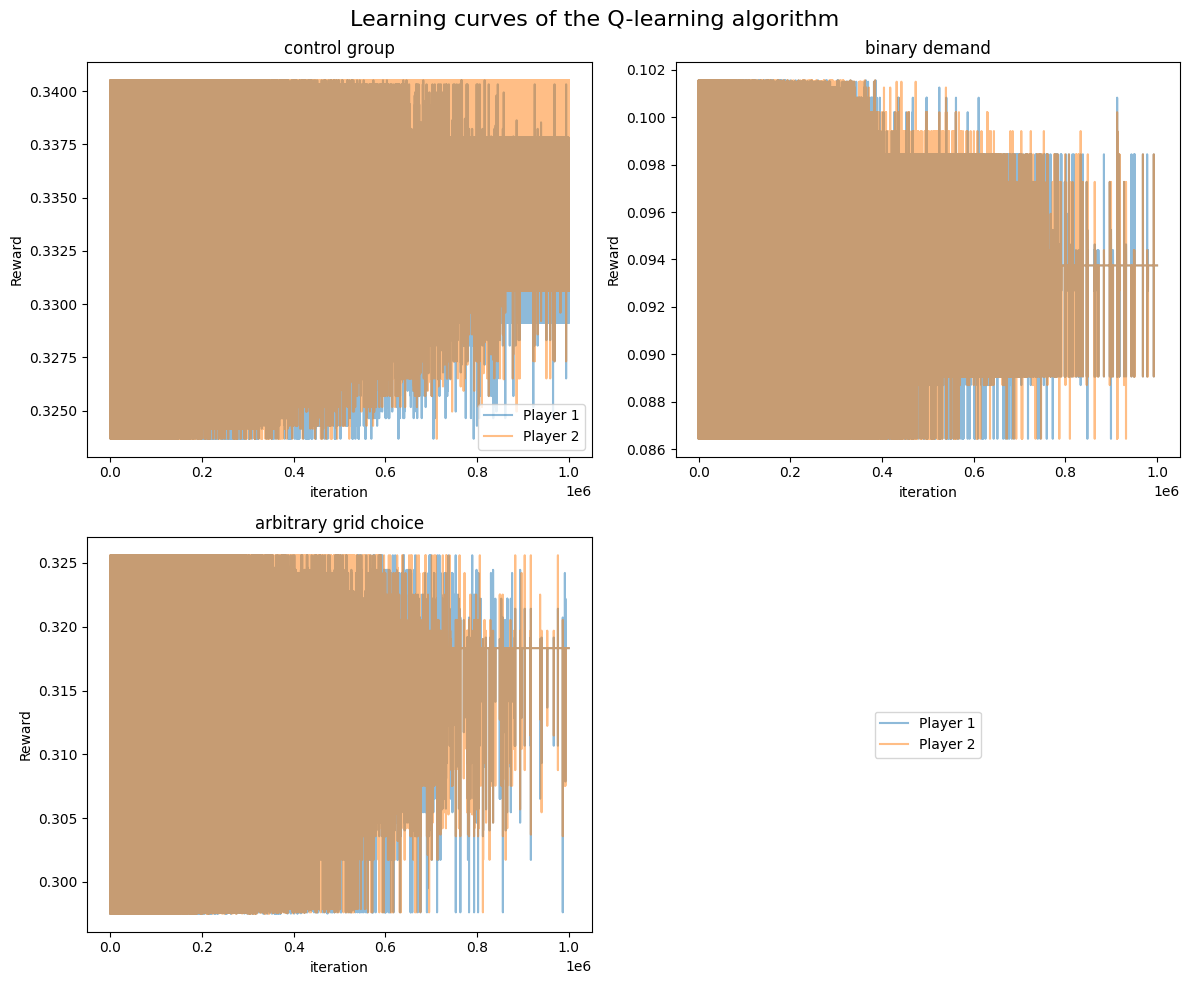

In [4]:
num_players = 2
num_graphs = len(aggregated_agents)
legend = ["control group", "binary demand", "arbitrary grid choice"]

# Create a figure with a 3x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes array to iterate over the subplots
axes = axes.flatten()

# Loop to iterate through the periods and subplots
for graph_num in range(num_graphs):
    ax = axes[graph_num]
    num_players = len(aggregated_agents[graph_num][0])
    # Plot curves for each player in the subplot
    for player in range(num_players):
        ax.plot(aggregated_agents[graph_num][:, player], alpha=0.5, label=f'Player {player + 1}')
    
    # Set the title of the subplot with the corresponding period
    ax.set_title(legend[graph_num])
    
    # Set the labels of the subplot
    ax.set_xlabel('iteration')
    ax.set_ylabel('Reward')

    # Add a legend to the first subplot
    if graph_num == 0:
        ax.legend()

# Remove any unused subplots
if num_graphs < 3:
    for i in range(num_graphs, 3):
        fig.delaxes(axes[i])

# Create a legend in the last subplot
legend_ax = axes[-1]
legend_ax.axis('off')

# Get the legend handles and labels from the first subplot
handles, labels = axes[0].get_legend_handles_labels()

# Create the legend in the last subplot
legend_ax.legend(handles, labels, loc='center')

fig.suptitle('Learning curves of the Q-learning algorithm', fontsize=16)


# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [5]:
#attention redéfinir price nash and collusion for binary demand
prices = pr.PriceOptimizer()
prices_binary = pr.PriceOptimizer(binary_demand=True)
collusion_profit, collusion_prices = prices.CollusionPrice()
collusion_profit_binary, collusion_prices_binary = prices_binary.CollusionPrice()
nash_profit, nash_prices = prices.NashPrice()
nash_profit_binary, nash_prices_binary = prices_binary.NashPrice()

RN = nash_profit, nash_profit_binary, nash_profit
RC = collusion_profit, collusion_profit_binary, collusion_profit
    
Rmean = np.zeros((len(aggregated_agents), 2))
DRmean = np.zeros((len(aggregated_agents), 2))   
    
for i in range (len(aggregated_agents)): 
    for j in range (2):
        Rmean[i][j] = aggregated_agents[i][-100:,j].mean()
        DRmean[i][j] = (Rmean[i][j] - RN[i])/(RC[i] - RN[i]) 

print(DRmean)

[[0.97166556 0.97097274]
 [0.75       0.75      ]
 [0.83446541 0.83446541]]


[0.97131915 0.75       0.83446541]


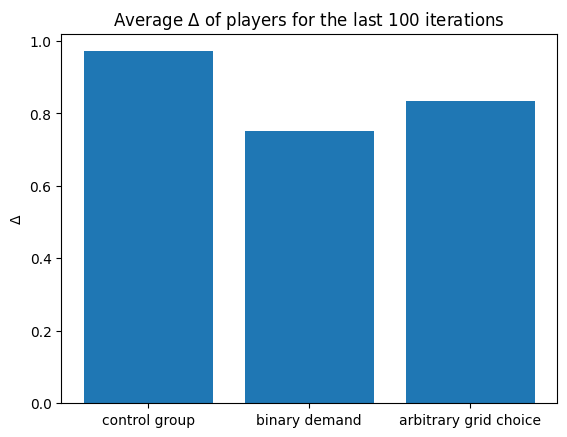

In [6]:
av = np.mean(DRmean, axis=1)
print(av)
plt.bar(["control group", "binary demand", "arbitrary grid choice"],av)
plt.ylabel('$\\Delta$')
plt.title('Average $\\Delta$ of players for the last 100 iterations')
plt.show()